In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\Data Science\udemy\Notebooks\08-Linear-Regression-Models\Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis = 1)
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly_con = PolynomialFeatures(degree=2, include_bias = False)

In [8]:
poly_features = poly_con.fit_transform(X)

In [9]:
poly_features.shape

(200, 9)

In [10]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [11]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [12]:
 from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.30, random_state = 101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
MAE = mean_absolute_error(y_test, y_pred)

In [21]:
MSE = mean_squared_error(y_test, y_pred)

In [22]:
RSME = np.sqrt(MSE)

In [23]:
print(f"MAE: {MAE}, MSE: {MSE}, RSME: {RSME}")

MAE: 0.48967980448035886, MSE: 0.44175055104033895, RSME: 0.6646431757269


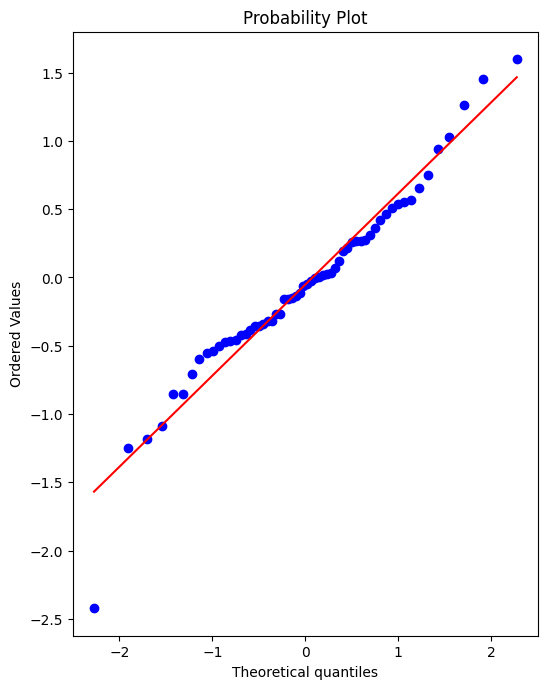

In [24]:
from scipy.stats import probplot
fig, ax = plt.subplots(figsize=(6, 8), dpi=100)
_ = probplot(y_test - y_pred, plot=ax)

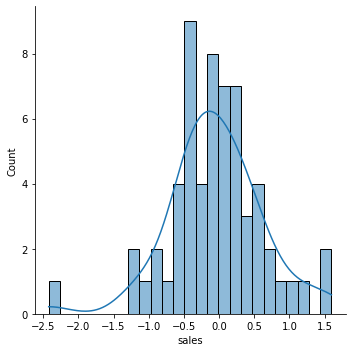

In [25]:
sns.displot((y_test-y_pred), bins=25, kde=True)
plt.show()

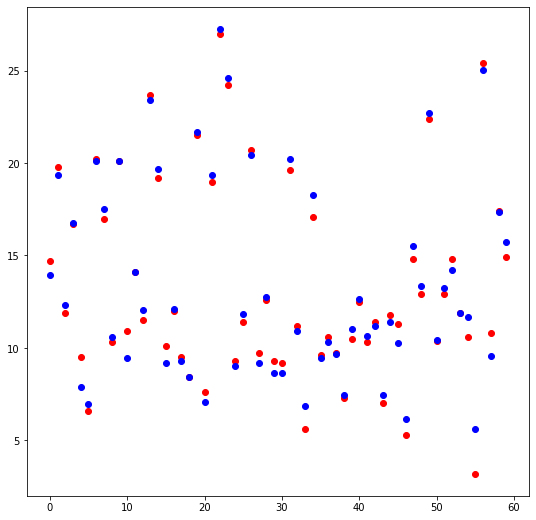

In [26]:
plt.figure(figsize=(9, 9))
plt.scatter(np.arange(0, len(y_test)), y_test, color='r')
plt.scatter(np.arange(0, len(y_pred)), y_pred, color='b')
plt.show()

In [27]:
#create the different order poly
#split poly feat train/test
#fit on train
#store/save the rmse for Both the train and test
#Plot the results (error vs poly order)

In [28]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1, 10):
    poly_conv = PolynomialFeatures(degree = d, include_bias = False)
    poly_feature = poly_conv.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size = 0.3, random_state = 101)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_train)
    train_rmse_errors.append(mean_squared_error(y_train, y_pred)**0.5)
    y_pred = model.predict(X_test)
    test_rmse_errors.append(mean_squared_error(y_test, y_pred)**0.5)

In [29]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292234,
 0.4339344356902067,
 0.3517083688399345,
 0.2509342920355839,
 0.1940630535738855,
 5.421705891465096,
 0.14320513075967775,
 0.1725152046623904]

In [30]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269,
 0.5803286825225046,
 0.5077742636722449,
 2.575818164530007,
 4.305903206969613,
 1379.0990147451773,
 4212.9967596479455,
 95995.41492818364]

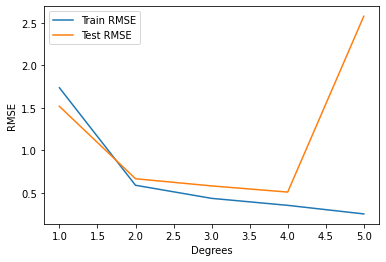

In [31]:
plt.plot(range(1, 6), train_rmse_errors[:5], label = "Train RMSE")
plt.plot(range(1, 6), test_rmse_errors[:5], label = "Test RMSE")
plt.ylabel('RMSE')
plt.xlabel('Degrees')
plt.legend()
plt.show()

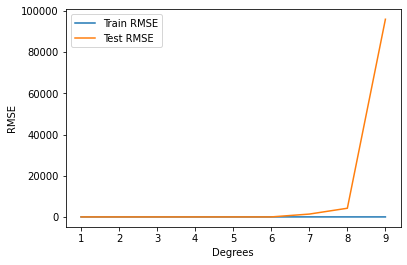

In [32]:
plt.plot(range(1, 10), train_rmse_errors, label = "Train RMSE")
plt.plot(range(1, 10), test_rmse_errors, label = "Test RMSE")
plt.ylabel('RMSE')
plt.xlabel('Degrees')
plt.legend()
plt.show()

In [38]:
final_conv = PolynomialFeatures(degree = 3, include_bias =False)

In [39]:
lr_f = LinearRegression()

In [40]:
f_conv_X = final_conv.fit_transform(X)

In [41]:
lr_f.fit(f_conv_X, y)

LinearRegression()

In [42]:
from joblib import dump, load

In [43]:
dump(lr_f, 'poly_model.joblib')

['poly_model.joblib']

In [44]:
dump(final_conv, 'polynomial_conv.joblib')

['polynomial_conv.joblib']

In [46]:
load_conv = load('polynomial_conv.joblib')

In [50]:
inputs = load_conv.fit_transform([[149, 22, 12]])

In [51]:
load_model = load('poly_model.joblib')

In [52]:
load_model.predict(inputs)

array([14.64501014])